## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
    建立神經網路 Using l1
"""
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128], l1_ratio = 1e-4 ):
    input_layer = keras.layers.Input(input_shape)
    
    for i , n_units in enumerate(num_neurons):
        if i == 0 :
            x = keras.layers.Dense(units = n_units, 
                                   activation = 'relu',
                                   name = 'hidden_layer' + str(i+1),
                                   kernel_regularizer = l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)   
    
    out = keras.layers.Dense(units = output_units, activation = 'softmax', name = 'output')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4]


In [7]:
results_l1 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results_l1[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0717 18:52:24.700954  7884 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 18:52:24.785574  7884 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 18:52:25.133117  7884 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 18:52:25.148746  7884 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 18:52:25.176476  7884 deprecation_wrapper.py:119] From C:\Anaconda3\li

Experiment with Regulizer = 0.010000


W0717 18:52:25.453741  7884 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0717 18:52:25.765273  7884 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 31s 610us/step - loss: 198.6945 - acc: 0.2384 - val_loss: 41.1672 - val_acc: 0.2625
Epoch 2/50
50000/50000 [==============================] - 20s 395us/step - loss: 19.1322 - acc: 0.1164 - val_loss: 7.2866 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 15s 304us/step - loss: 4.1033 - acc: 0.0981 - val_loss: 2.6424 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 21s 419us/step - loss: 2.4853 - acc: 0.0987 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 20s 404us/step - loss: 2.4626 - acc: 0.0970 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 22s 444us/step - loss: 2.4626 - acc: 0.0968 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 20s 401us/step - loss: 2.4626 - acc: 0.0970 - val_loss

50000/50000 [==============================] - 15s 300us/step - loss: 6.0071 - acc: 0.2749 - val_loss: 5.8142 - val_acc: 0.3365
Epoch 2/50
50000/50000 [==============================] - 15s 292us/step - loss: 5.7250 - acc: 0.3620 - val_loss: 5.6454 - val_acc: 0.3809
Epoch 3/50
50000/50000 [==============================] - 14s 285us/step - loss: 5.5817 - acc: 0.3948 - val_loss: 5.5165 - val_acc: 0.4001
Epoch 4/50
50000/50000 [==============================] - 14s 289us/step - loss: 5.4606 - acc: 0.4143 - val_loss: 5.4050 - val_acc: 0.4210
Epoch 5/50
50000/50000 [==============================] - 14s 284us/step - loss: 5.3484 - acc: 0.4317 - val_loss: 5.2974 - val_acc: 0.4323
Epoch 6/50
50000/50000 [==============================] - 15s 294us/step - loss: 5.2459 - acc: 0.4458 - val_loss: 5.2070 - val_acc: 0.4474
Epoch 7/50
50000/50000 [==============================] - 14s 283us/step - loss: 5.1497 - acc: 0.4576 - val_loss: 5.1367 - val_acc: 0.4462
Epoch 8/50
50000/50000 [==============

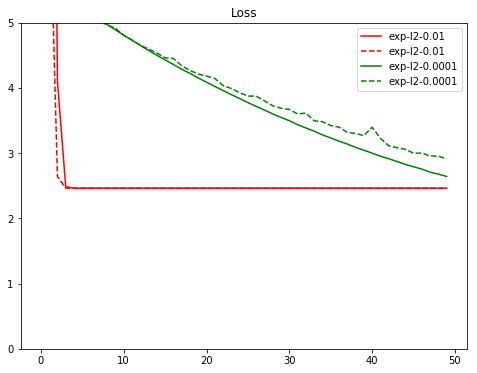

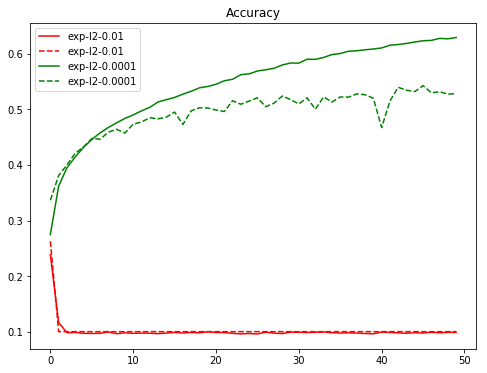

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l1.keys()):
    plt.plot(range(len(results_l1[cond]['train-loss'])),results_l1[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1[cond]['valid-loss'])),results_l1[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l1.keys()):
    plt.plot(range(len(results_l1[cond]['train-acc'])),results_l1[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1[cond]['valid-acc'])),results_l1[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
"""
    建立神經網路 Using l2
"""
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128], l2_ratio = 1e-4 ):
    input_layer = keras.layers.Input(input_shape)
    
    for i , n_units in enumerate(num_neurons):
        if i == 0 :
            x = keras.layers.Dense(units = n_units, 
                                   activation = 'relu',
                                   name = 'hidden_layer' + str(i+1),
                                   kernel_regularizer = l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)   
    
    out = keras.layers.Dense(units = output_units, activation = 'softmax', name = 'output')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]


In [11]:
results_l2 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results_l2[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 301us/step - loss: 2.1831 - acc: 0.2686 - val_loss: 2.0227 - val_acc: 0.3454
Epoch 2/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.9595 - acc: 0.3673 - val_loss: 1.9094 - val_acc: 0.3742
Epoch 3/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.8679 - acc: 0.3964 - val_loss: 1.8359 - val_acc: 0.4085
Epoch 4/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.8049 - acc: 0.4214 - val_loss: 1.7838 - val_acc: 0.4221
Epoch 5/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.7576 - acc: 0.4349 - val_loss: 1.7400 - val_acc: 0.4382
Epoch 6/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.7157 - acc: 0.4498 - val_loss: 1.7205 - val_acc: 0.4364
Epoch 7/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.6822 - acc: 0.4618 - val_loss: 1.

50000/50000 [==============================] - 14s 274us/step - loss: 2.0320 - acc: 0.2741 - val_loss: 1.8618 - val_acc: 0.3471
Epoch 2/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.8070 - acc: 0.3663 - val_loss: 1.7558 - val_acc: 0.3861
Epoch 3/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.7236 - acc: 0.3969 - val_loss: 1.6930 - val_acc: 0.4081
Epoch 4/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.6645 - acc: 0.4176 - val_loss: 1.6405 - val_acc: 0.4261
Epoch 5/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.6189 - acc: 0.4332 - val_loss: 1.6151 - val_acc: 0.4339
Epoch 6/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.5809 - acc: 0.4460 - val_loss: 1.5857 - val_acc: 0.4431
Epoch 7/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.5479 - acc: 0.4593 - val_loss: 1.5502 - val_acc: 0.4546
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.7966 - acc: 0.3675 - val_loss: 1.7515 - val_acc: 0.3805
Epoch 3/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.7179 - acc: 0.3982 - val_loss: 1.6843 - val_acc: 0.4109
Epoch 4/50
50000/50000 [==============================] - 15s 307us/step - loss: 1.6595 - acc: 0.4204 - val_loss: 1.6428 - val_acc: 0.4251
Epoch 5/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.6130 - acc: 0.4364 - val_loss: 1.6037 - val_acc: 0.4374
Epoch 6/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.5764 - acc: 0.4499 - val_loss: 1.5714 - val_acc: 0.4476
Epoch 7/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.5437 - acc: 0.4611 - val_loss: 1.5470 - val_acc: 0.4520
Epoch 8/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.5149 - acc: 0.4701 - val_loss: 1.5422 - val_acc: 0.4485
Epoch 9/50
50000/50000 [===

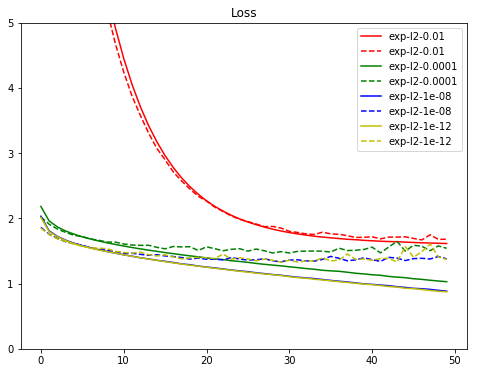

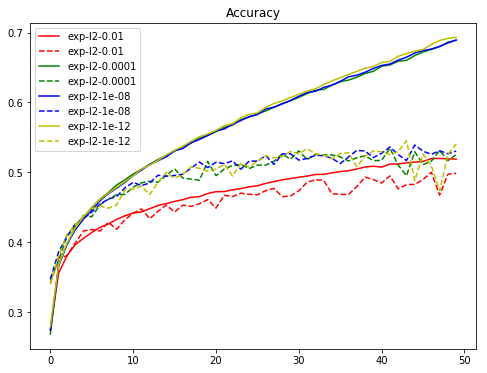

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l2.keys()):
    plt.plot(range(len(results_l2[cond]['train-loss'])),results_l2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l2[cond]['valid-loss'])),results_l2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l2.keys()):
    plt.plot(range(len(results_l2[cond]['train-acc'])),results_l2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l2[cond]['valid-acc'])),results_l2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()